# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [1]:
#import libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load datasets
from sklearn.datasets import load_iris
iris = load_iris()
idf = pd.DataFrame(iris.data, columns=iris.feature_names)
idf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## <font color = blue> 2. Data Manipulationa and visualization

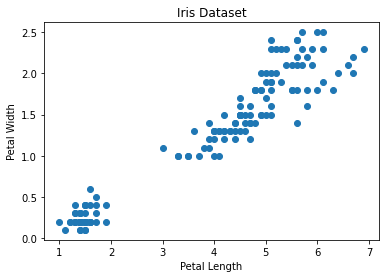

In [3]:
#visualize your data here
x= idf['petal length (cm)']
y = idf['petal width (cm)']
plt.scatter(x,y)
plt.title("Iris Dataset")
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
plt.show()

## <font color = blue> 3. Train model

In [47]:
#train your model here
from sklearn.cluster import KMeans
X = idf[['petal length (cm)', 'petal width (cm)']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans

KMeans(n_clusters=3, random_state=0)

## <font color = blue> 4. Explore KMeans attributes

In [72]:
#check Kmean algorithm's attribute
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [73]:
kmeans.inertia_

31.371358974358973

In [74]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
kmeans.n_iter_

6

In [76]:
kmeans.n_features_in_

2

In [77]:
kmeans.feature_names_in_

array(['petal length (cm)', 'petal width (cm)'], dtype=object)

## <font color = blue> 5. Prediction

In [17]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
x_sample = [[1.4,0.2],[2.3,0.6],[2.3,0.2]]


In [71]:
y_pred = kmeans.predict(x_sample)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 0, 0])

## <font color = blue> 6. Plotting clusters with thier centroids

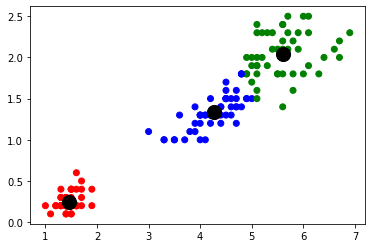

In [65]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.
import seaborn as sns
colormap = np.array(['r', 'g', 'b'])
categories = kmeans.predict(X)
X = idf[['petal length (cm)', 'petal width (cm)']]
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[categories])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);


## <font color = blue> 7. Use elbow method to choose K for Kmean

In [66]:
# plot grah to decide K value for given dataset.
distortions = []
K = range(1,4)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


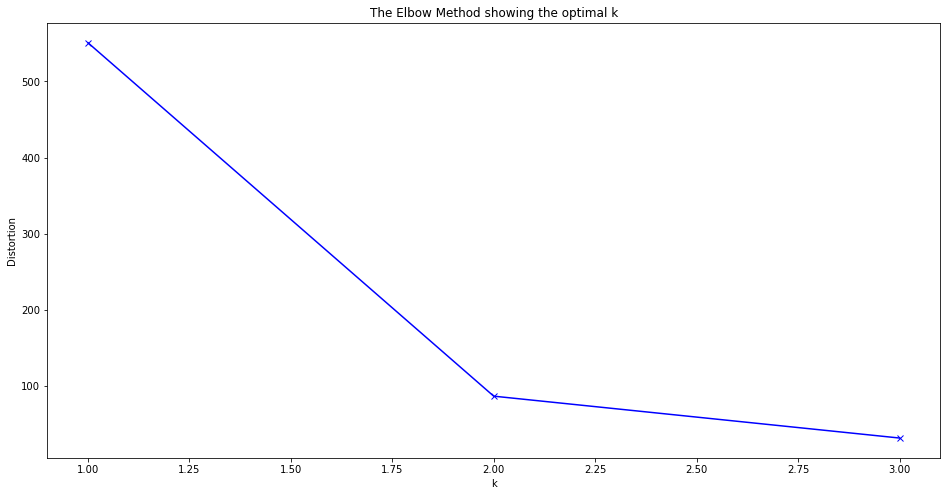

In [67]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()